In [10]:
import pandas as pd
from scipy.stats import chi2_contingency, ttest_ind

# 加载数据
df = pd.read_csv(r'..\models\LGBMRegressor_20250719\LGBMRegressor_20250719_predictions.csv')


In [17]:
df

,月份,星期,物品尺寸,包装,品种,产地,城市名称,实际值,预测值,差值,绝对差值,相对误差(%)
0,11,5,med,1 1/9 bushel cartons,PIE TYPE,ILLINOIS,CHICAGO,17.0,20.704252,3.704252,3.704252,21.789718
1,10,5,sml,36 inch bins,HOWDEN TYPE,MASSACHUSETTS,BOSTON,200.0,183.553793,-16.446207,16.446207,8.223104
2,10,5,sml,24 inch bins,PIE TYPE,PENNSYLVANIA,BOSTON,175.0,172.523793,-2.476207,2.476207,1.414975
3,10,5,jbo,36 inch bins,HOWDEN TYPE,MICHIGAN,BOSTON,175.0,180.891037,5.891037,5.891037,3.366307
4,10,5,med-lge,24 inch bins,PIE TYPE,PENNSYLVANIA,COLUMBIA,225.0,200.476039,-24.523961,24.523961,10.899538
...,...,...,...,...,...,...,...,...,...,...,...,...
291,10,5,xlge,24 inch bins,CINDERELLA,MASSACHUSETTS,BOSTON,272.5,270.024237,-2.475763,2.475763,0.908537
292,9,4,xlge,36 inch bins,HOWDEN TYPE,MICHIGAN,ST. LOUIS,115.0,126.252608,11.252608,11.252608,9.784876
293,10,5,sml,bushel cartons,MINIATURE,PENNSYLVANIA,COLUMBIA,28.0,27.481524,-0.518476,0.518476,1.851698
294,10,5,med,24 inch bins,HOWDEN TYPE,TEXAS,DALLAS,137.5,136.901172,-0.598828,0.598828,0.435511


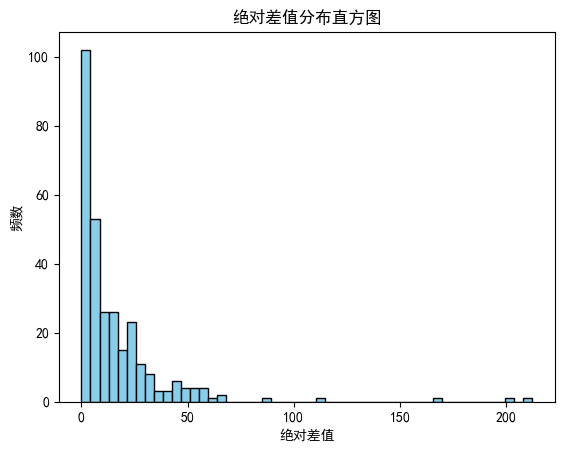

In [23]:
# 绘制差值分布直方图
import matplotlib.pyplot as plt
# 设置中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.hist(df['绝对差值'], bins=50, color='skyblue', edgecolor='black')
plt.title('绝对差值分布直方图')
plt.xlabel('绝对差值')
plt.ylabel('频数')
plt.show()

In [24]:

# 划分正确样本和错误样本
correct_samples = df[df['相对误差(%)'] < 5]
error_samples = df[df['相对误差(%)'] >= 50]


In [25]:
print('低误差样本数量：', len(correct_samples))
correct_samples

低误差样本数量： 114


,月份,星期,物品尺寸,包装,品种,产地,城市名称,实际值,预测值,差值,绝对差值,相对误差(%)
2,10,5,sml,24 inch bins,PIE TYPE,PENNSYLVANIA,BOSTON,175.0,172.523793,-2.476207,2.476207,1.414975
3,10,5,jbo,36 inch bins,HOWDEN TYPE,MICHIGAN,BOSTON,175.0,180.891037,5.891037,5.891037,3.366307
8,11,5,xlge,24 inch bins,FAIRYTALE,MARYLAND,BALTIMORE,200.0,207.871487,7.871487,7.871487,3.935744
10,9,2,lge,36 inch bins,HOWDEN TYPE,ILLINOIS,ST. LOUIS,135.0,134.456398,-0.543602,0.543602,0.402668
13,10,5,jbo,24 inch bins,HOWDEN WHITE TYPE,TEXAS,DALLAS,150.0,155.913915,5.913915,5.913915,3.942610
...,...,...,...,...,...,...,...,...,...,...,...,...
289,9,5,lge,36 inch bins,HOWDEN TYPE,NEW YORK,NEW YORK,150.0,147.725801,-2.274199,2.274199,1.516132
291,10,5,xlge,24 inch bins,CINDERELLA,MASSACHUSETTS,BOSTON,272.5,270.024237,-2.475763,2.475763,0.908537
293,10,5,sml,bushel cartons,MINIATURE,PENNSYLVANIA,COLUMBIA,28.0,27.481524,-0.518476,0.518476,1.851698
294,10,5,med,24 inch bins,HOWDEN TYPE,TEXAS,DALLAS,137.5,136.901172,-0.598828,0.598828,0.435511


In [26]:
print('高误差样本数量：', len(error_samples))
error_samples

高误差样本数量： 21


,月份,星期,物品尺寸,包装,品种,产地,城市名称,实际值,预测值,差值,绝对差值,相对误差(%)
5,10,5,med,1 1/9 bushel crates,MINIATURE,NEW YORK,NEW YORK,18.0,65.312484,47.312484,47.312484,262.847133
9,8,5,med,50 lb sacks,CINDERELLA,FLORIDA,BALTIMORE,29.0,7.466631,-21.533369,21.533369,74.252996
19,9,5,med-lge,24 inch bins,CINDERELLA,CALIFORNIA,LOS ANGELES,0.3,23.951493,23.651493,23.651493,7883.830981
46,9,5,lge,50 lb sacks,CINDERELLA,VIRGINIA,BALTIMORE,15.0,27.450658,12.450658,12.450658,83.004389
59,9,5,med-lge,36 inch bins,CINDERELLA,CALIFORNIA,LOS ANGELES,0.3,29.034546,28.734546,28.734546,9578.181869
77,9,5,med,36 inch bins,HOWDEN WHITE TYPE,CALIFORNIA,LOS ANGELES,0.5,47.353755,46.853755,46.853755,9370.750907
90,9,5,med,36 inch bins,HOWDEN WHITE TYPE,CALIFORNIA,LOS ANGELES,250.0,47.353755,-202.646245,202.646245,81.058498
98,10,5,med,24 inch bins,PIE TYPE,NEW MEXICO,DALLAS,100.0,155.658912,55.658912,55.658912,55.658912
152,9,5,jbo,24 inch bins,BIG MACK TYPE,MARYLAND,BALTIMORE,50.0,93.142351,43.142351,43.142351,86.284701
171,10,5,med,24 inch bins,PIE TYPE,NEW MEXICO,DALLAS,100.0,155.658912,55.658912,55.658912,55.658912


In [30]:
# 定义分类变量和连续变量列表
categorical_columns = ['物品尺寸', '包装', '品种', '产地', '城市名称']
continuous_columns = ['月份', '星期']

# 进行卡方检验分析分类变量在正确样本和错误样本中的分布差异
for column in categorical_columns:
    contingency_table = pd.crosstab(df['相对误差(%)'] < 5, df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'{column}的卡方检验结果：')
    print(f'卡方值：{chi2}, p值：{p}')
    if p < 0.05:
        print(f'{column}在正确样本和错误样本中的分布差异显著。')
    else:
        print(f'{column}在正确样本和错误样本中的分布差异不显著。')
    print('\n')


物品尺寸的卡方检验结果：
卡方值：24.10342499442293, p值：0.0004998673595665894
物品尺寸在正确样本和错误样本中的分布差异显著。


包装的卡方检验结果：
卡方值：23.888473678628586, p值：0.004481157960331157
包装在正确样本和错误样本中的分布差异显著。


品种的卡方检验结果：
卡方值：25.478897106886585, p值：0.002484678361548567
品种在正确样本和错误样本中的分布差异显著。


产地的卡方检验结果：
卡方值：59.190069138800084, p值：5.193938453542929e-06
产地在正确样本和错误样本中的分布差异显著。


城市名称的卡方检验结果：
卡方值：36.873334886864825, p值：0.00012100006590947968
城市名称在正确样本和错误样本中的分布差异显著。




In [31]:

# 进行t检验分析连续变量在正确样本和错误样本中的分布差异
for column in continuous_columns:
    t_statistic, p_value = ttest_ind(df.loc[df['相对误差(%)'] < 5, column], df.loc[df['相对误差(%)'] >= 50, column])
    print(f'{column}的t检验结果：')
    print(f't值：{t_statistic}, p值：{p_value}')
    if p_value < 0.05:
        print(f'{column}在正确样本和错误样本中的分布差异显著。')
    else:
        print(f'{column}在正确样本和错误样本中的分布差异不显著。')
    print('\n')
    

月份的t检验结果：
t值：1.9281746098808616, p值：0.05596447380330658
月份在正确样本和错误样本中的分布差异不显著。


星期的t检验结果：
t值：-0.9663188583634501, p值：0.335638488820456
星期在正确样本和错误样本中的分布差异不显著。




d:\Anaconda_24\envs\all_can_cpu\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [33]:
# 从正确样本中选取 2 组数据
correct_sample_1 = correct_samples.iloc[0]
correct_sample_2 = correct_samples.iloc[1]

# 从错误样本中选取 2 组数据
error_sample_1 = error_samples.iloc[0]
error_sample_2 = error_samples.iloc[1]


In [84]:

# 输出选取的样本数据
print("正确样本 1：")
print(correct_sample_1)
print("\n正确样本 2：")
print(correct_sample_2)

print("\n错误样本 1：")
print(error_sample_1)
print("\n错误样本 2：")
print(error_sample_2)

正确样本 1：
月份                   10
星期                    5
物品尺寸                sml
包装         24 inch bins
品种             PIE TYPE
产地         PENNSYLVANIA
城市名称             BOSTON
实际值               175.0
预测值          172.523793
差值            -2.476207
绝对差值           2.476207
相对误差(%)        1.414975
Name: 2, dtype: object

正确样本 2：
月份                   10
星期                    5
物品尺寸                jbo
包装         36 inch bins
品种          HOWDEN TYPE
产地             MICHIGAN
城市名称             BOSTON
实际值               175.0
预测值          180.891037
差值             5.891037
绝对差值           5.891037
相对误差(%)        3.366307
Name: 3, dtype: object

错误样本 1：
月份                          10
星期                           5
物品尺寸                       med
包装         1 1/9 bushel crates
品种                   MINIATURE
产地                    NEW YORK
城市名称                  NEW YORK
实际值                       18.0
预测值                  65.312484
差值                   47.312484
绝对差值                 47.312484
相对误差(%)    

In [86]:

# 将样本数据转换为DataFrame
correct_samples_df = pd.DataFrame([correct_sample_1, correct_sample_2])
error_samples_df = pd.DataFrame([error_sample_1, error_sample_2])

# 输出选取的样本数据
print("正确样本：")
print(correct_samples_df)
print("\n错误样本：")
print(error_samples_df)

正确样本：
   月份  星期 物品尺寸            包装           品种            产地    城市名称    实际值  \
2  10   5  sml  24 inch bins     PIE TYPE  PENNSYLVANIA  BOSTON  175.0   
3  10   5  jbo  36 inch bins  HOWDEN TYPE      MICHIGAN  BOSTON  175.0   

          预测值        差值      绝对差值   相对误差(%)  
2  172.523793 -2.476207  2.476207  1.414975  
3  180.891037  5.891037  5.891037  3.366307  

错误样本：
   月份  星期 物品尺寸                   包装          品种        产地       城市名称   实际值  \
5  10   5  med  1 1/9 bushel crates   MINIATURE  NEW YORK   NEW YORK  18.0   
9   8   5  med          50 lb sacks  CINDERELLA   FLORIDA  BALTIMORE  29.0   

         预测值         差值       绝对差值     相对误差(%)  
5  65.312484  47.312484  47.312484  262.847133  
9   7.466631 -21.533369  21.533369   74.252996  


In [90]:
# 将样本数据转换为DataFrame
correct_error_samples_df = pd.DataFrame([correct_sample_1, correct_sample_2,error_sample_1, error_sample_2])
# 加入样本标签
correct_error_samples_df['样本类型'] = ['正确样本 1', '正确样本 2', '错误样本 1', '错误样本 2']
print(correct_error_samples_df[['样本类型','月份', '星期', '物品尺寸', '包装', '品种', '产地', '城市名称', '实际值', '预测值','相对误差(%)']])

     样本类型  月份  星期 物品尺寸                   包装           品种            产地  \
2  正确样本 1  10   5  sml         24 inch bins     PIE TYPE  PENNSYLVANIA   
3  正确样本 2  10   5  jbo         36 inch bins  HOWDEN TYPE      MICHIGAN   
5  错误样本 1  10   5  med  1 1/9 bushel crates    MINIATURE      NEW YORK   
9  错误样本 2   8   5  med          50 lb sacks   CINDERELLA       FLORIDA   

        城市名称    实际值         预测值     相对误差(%)  
2     BOSTON  175.0  172.523793    1.414975  
3     BOSTON  175.0  180.891037    3.366307  
5   NEW YORK   18.0   65.312484  262.847133  
9  BALTIMORE   29.0    7.466631   74.252996  


In [77]:
# 根据相对误差建立一个简单的决策树
# 这里只是一个示例，实际应用中可能需要更复杂的模型和特征工程
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 将相对误差转换为三分类标签：5，50为分界划分 低(1), 中(2), 高(3)
df['相对误差分类'] = df['相对误差(%)'].apply(lambda x: 1 if x < 5 else 2 if x < 40 else 3)
# 划分特征和标签
X = df[['月份', '星期', '物品尺寸', '包装', '品种', '产地', '城市名称']]
y = df['相对误差分类']

# 直接训练决策树模型
model = DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=42)
model.fit(X, y)
# 输出模型准确率
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f'决策树模型准确率：{accuracy:.2f}')

决策树模型准确率：0.68


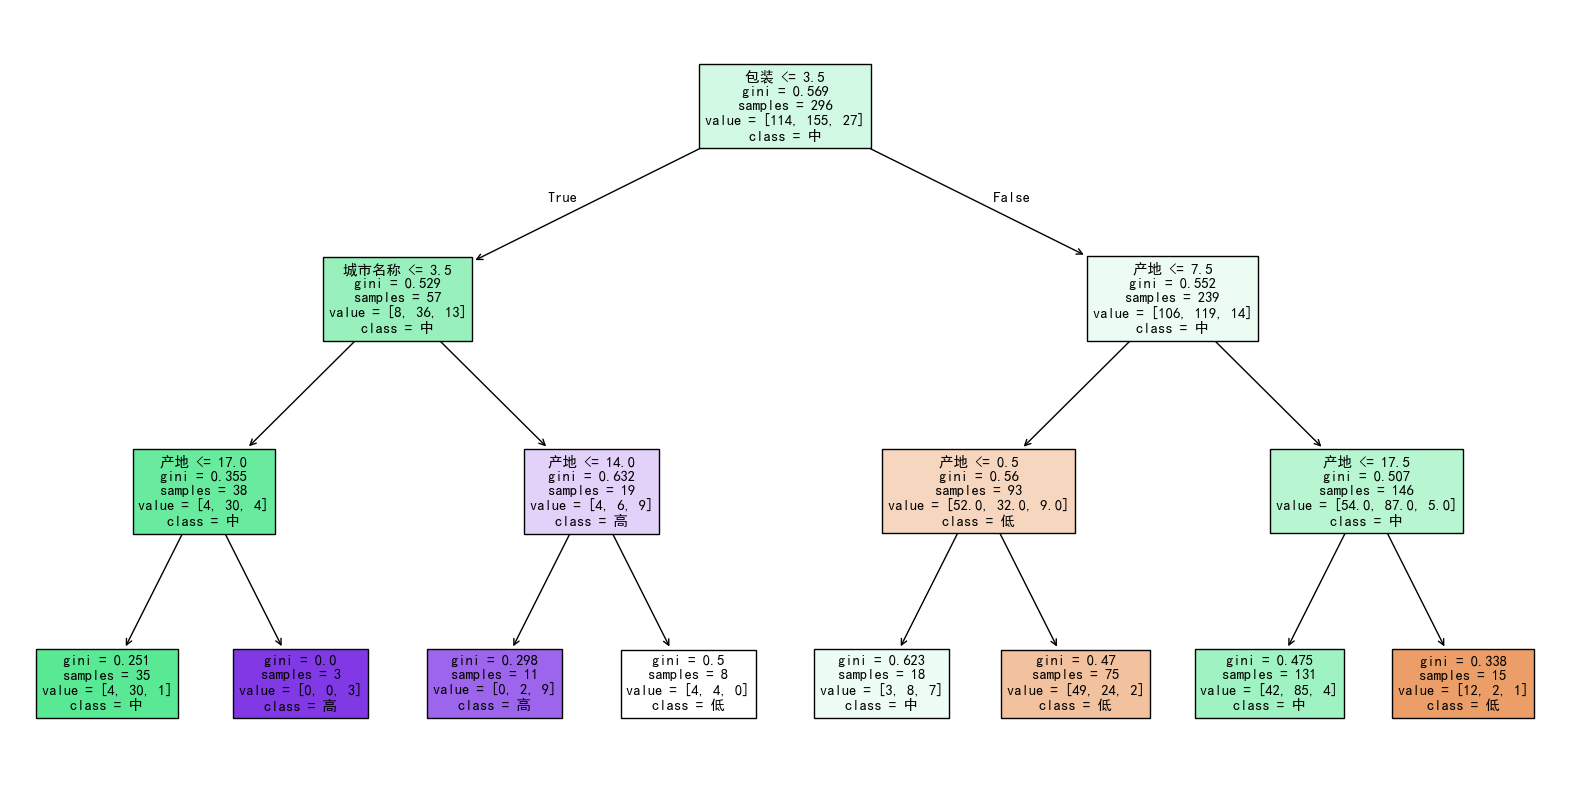

In [78]:

# 绘制决策树
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['低', '中', '高'])
plt.show()
